In [11]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.base.datetools import dates_from_str
import seaborn as sn
import matplotlib.pyplot as plt
import dateutil.parser

In [12]:
df = pd.read_csv("final_dataset.csv")
df['Date'] = pd.to_datetime(df['Issue Date'])
df.index = df.Date
df.head()

,Violation Precinct,Issue Date,count,day,month,year,dayofweek,Date
Date,,,,,,,,
2013-01-02,0,2013-01-02,2,2,1,2013,2,2013-01-02
2013-01-03,0,2013-01-03,1,3,1,2013,3,2013-01-03
2013-01-04,0,2013-01-04,1,4,1,2013,4,2013-01-04
2013-01-05,0,2013-01-05,1,5,1,2013,5,2013-01-05
2013-01-06,0,2013-01-06,2,6,1,2013,6,2013-01-06


In [13]:
df = df.loc[df['Violation Precinct'] < 124]
violation_precincts = df["Violation Precinct"].unique()

final_df = None

i = 0
final_df = None

for precinct in violation_precincts:
    dataset = df.loc[df['Violation Precinct'] == precinct]
    dataset = dataset[(dataset['year'] < 2017)]
    dataset[precinct] = dataset['count']
    dataset = dataset[precinct]
    if i == 0:
        final_df = dataset
    else:
        final_df = pd.merge(final_df, dataset, how = 'left', left_index=True, right_index=True)
        
    i += 1
    
    
    
    
#     train = dataset['2015-01-01':'2016-11-30']
#     test  = dataset['2016-11-30':]
#     model = VAR(train)
#     model.select_order(15)
#     results = model.fit(maxlags=15, ic='aic')

In [14]:
final_df.head()
train = final_df['2013-01-02':'2016-01-30']
test  = final_df['2016-01-30':]

train = train.drop(59, axis=1)
test = test.drop(59, axis=1)

print(train.isna().sum().sum())

train = train.fillna(train.mean())
test = test.fillna(test.mean())

print(train.isna().sum().sum())

model = VAR(train)
model.fit()
model.select_order(4)
results = model.fit(maxlags=4, ic='aic')

42302
0


C:\Users\sraja\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [15]:
lag = results.k_ar
predictions = results.forecast(train.values[-lag:], 337)

In [16]:
import math

j = 0

total_rmse = 0

for i in range(len(test.columns)):
    if i == 59:
        j += 1
        
    MSE = np.square(np.subtract(test[j].to_numpy(),predictions[:, i])).mean() 
    RMSE = math.sqrt(MSE)
    print(RMSE)
    total_rmse += RMSE
    
    test[j] = predictions[:, i]
    j += 1
print("Average_RMSE", total_rmse / len(test.columns))

14.336008216454749
64.55575583612278
1.507370453061257
0.26445561739038814
0.39511761806770856
30.494589362991633
43.18931722422693
27.29048712138166
0.33492636784591967
28.71393725780431
38.53514474352187
0.3248082047179667
0.6529645063676442
83.02686173557235
78.81281786934355
0.5506418644198031
1.0410150637734803
43.913203083134746
77.50728076614885
149.50563099424355
55.01367355717797
0.12478699577704512
1.432470627453198
34.20287177780897
48.465627770169945
20.730423432339673
19.129357096514376
6.743422742918117
23.260796988512812
0.32254359645020914
19.698698512856993
0.09103281219549114
19.30351411494175
28.525005320765022
34.4568374255821
0.15084786252192292
0.31113447338201516
0.14930437943910077
0.13611886511602578
0.26952091802225425
27.819547136933075
23.874912756705005
21.176794676932015
23.805305893434838
25.761554947659565
21.878606073548905
36.886902265522686
23.759229571997384
23.250649359667865
30.326835127049527
16.99334388404385
0.12029714314678262
40.88312605769166

In [132]:
test.head()

,0,1,2,3,4,5,6,7,8,9,...,114,115,116,117,118,119,120,121,122,123
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-30,8.741402,51.537071,1.278754,1.645795,1.100911,24.933380,54.422218,31.087672,1.592803,44.262113,...,25.536855,60.088400,1.161689,1.292392,1.086035,1.681708,-8.832406,14.212201,23.957140,9.450877
2016-01-31,22.902469,123.416921,1.366065,1.519799,1.018132,49.421659,47.336676,54.533369,1.539513,34.025692,...,85.679609,103.158858,1.310304,1.273087,0.963435,1.144885,-3.761336,12.764956,13.417226,14.378130
2016-02-01,38.095420,105.254644,1.379604,1.439869,1.127330,51.380180,85.861524,51.600293,1.802980,58.404277,...,138.032807,115.140705,1.232519,1.393250,1.398641,1.479295,15.501033,22.306126,26.709343,11.997708
2016-02-02,24.052388,120.999352,0.863603,1.304517,1.412099,83.581426,106.391238,54.951255,1.561754,60.164920,...,138.822035,95.923936,1.348032,1.295542,1.630499,1.247583,13.098309,25.806349,8.760627,13.662069
2016-02-03,38.365985,150.547316,1.589395,1.152249,1.403698,64.880531,112.922936,61.406179,1.454224,66.567531,...,142.130104,115.411438,1.333001,1.289279,1.305889,1.480323,10.623504,26.162656,21.444544,25.215893


<AxesSubplot:xlabel='Date'>

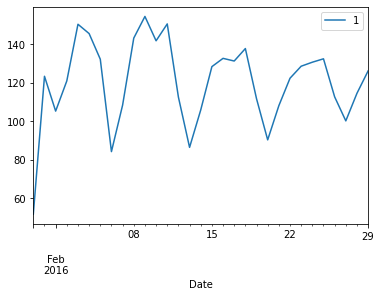

In [140]:
test = test[test.index < dateutil.parser.parse("2016-03-01")]
test.plot(y=1)

In [141]:
test.to_csv("VAR.csv")